In [1]:
from tqdm import tqdm
from matplotlib import pyplot as plt
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

In [9]:
## Test

import pandas as pd

# Create a DataFrame
data = {'title': ['Dexan', ],
        'email': ['ginggeli@hotmail.com', ]}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('test_emails.csv', index=False)

print("CSV file created successfully.")

# Load CSV data into DataFrame
df = pd.read_csv('test_emails.csv')

CSV file created successfully.


In [4]:
df = pd.read_csv("./market_data/processed.csv")
# Rename the column 'emails' to 'email'
df = df.rename(columns={'emails': 'email'})
df = df[['title', 'email']]
df.head(2)

,title,email
0,Anfa uitzendbureau,info@anfa.nl
1,Aditech Utrecht,info@aditech.nl


In [10]:
df.shape

(1, 2)

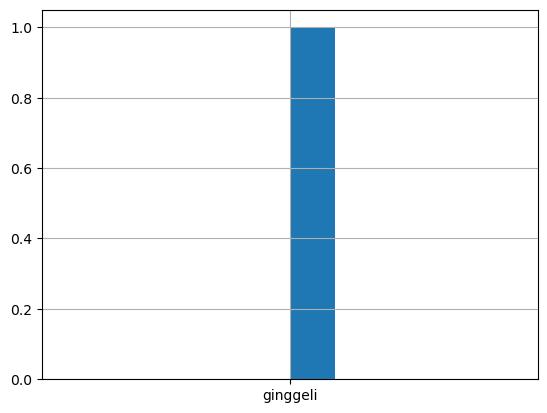

In [11]:
# Extract the part before the '@' symbol from each email address
df['email_prefix'] = df['email'].str.split('@').str[0]

# Plot a histogram of the email prefixes
df['email_prefix'].hist()

# Display the plot
plt.show()

In [12]:
# Email configuration
username = "info@bolar.co"
password = "Utrecht54321"
hostname = "bolar.co"
port = 465  # SMTP Port for SSL/TLS
sender_email = username

In [13]:
def send_email(df, sender_email, username, password, hostname, port):

    progress_bar = tqdm(total=len(df), desc="Sending Emails", unit="email")
    # Iterate over rows and send emails
    for index, row in df.iterrows():
        recipient_email = row['email']
        title = row['title']
        
        # Email content
        subject = "Ontdek de kracht van gerichte marketing voor jouw lokale bedrijf!"
        body = f"""Beste {title},<br />
            <br />
            Klaar om jouw lokale bedrijf te laten groeien met gerichte marketing? Ontdek onze exclusieve e-maillijsten voor lokale bedrijven!<br />            
            
            <ul>
                <li>✔️ <strong>Impact</strong>: Bereik potentiële klanten met een impactvolle benadering.</li>
                <li>✔️ <strong>Omzetboost</strong>: Verhoog je omzet met een uitgebreide lijst van e-mailadressen.</li>
                <li>✔️ <strong>Optimaliseer</strong>: Bereik jouw doelgroep persoonlijk en relevant.</li>
                <li>✔️ <strong>Waardevolle contacten</strong>: Bespaar tijd en moeite met directe toegang tot waardevolle contacten.</li>
            </ul>
            <br />
            Bekijk ons <strong>exclusieve aanbod</strong> op <a href="http://www.bolar.co">www.bolar.co</a> en vraag vrijblijvend een gratis offerte aan. Til jouw marketing naar een hoger niveau en zie direct resultaat<br />
            <br />
            Met vriendelijke groet,<br />
            Het team van Bolar
            """

        # Construct email message
        message = MIMEMultipart()
        message['From'] = sender_email
        message['To'] = recipient_email
        message['Subject'] = subject
        message.attach(MIMEText(body, 'html'))

        try:
            # Create SMTP session with SSL/TLS
            with smtplib.SMTP_SSL(hostname, port) as server:
                server.login(username, password)
                server.sendmail(sender_email, recipient_email, message.as_string())
                print(f"{recipient_email} email sent successfully.")
        except Exception as e:
            print(f"{recipient_email} Failed to send: {e}")
        
        # Update the progress bar
        progress_bar.update(1)

    # Close the progress bar
    progress_bar.close()

send_email(df, sender_email, username, password, hostname, port)

Sending Emails: 100%|██████████| 1/1 [00:00<00:00,  2.78email/s]

ginggeli@hotmail.com email sent successfully.
